In [ ]:
# Upload Data Set
from google.colab import files
uploaded = files.upload()

Saving videogamesales_main.sas7bdat to videogamesales_main.sas7bdat


In [ ]:
# loading necessary modules
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence

from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Loading the data set


In [ ]:
df = pd.read_sas(filepath_or_buffer = io.BytesIO(uploaded['videogamesales_main.sas7bdat']),format="sas7bdat")
df.head()

,Name,Platform,Genre,Publisher,Developer,Rating,Global_Sales,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
0,b'Madden NFL 11',b'PS3',b'Sports',b'Electronic Arts',b'EA Tiburon',b'E',2.38,2010.0,83.0,36.0,6.1,68.0
1,b'Sly Cooper and the Thievius Raccoonus',b'PS2',b'Platform',b'Sony Computer Entertainment',b'Sucker Punch',b'E',1.21,2002.0,86.0,41.0,8.6,184.0
2,b'The Lord of the Rings: Conquest',b'X360',b'Action',b'Electronic Arts',b'Pandemic Studios',b'T',0.63,2009.0,55.0,58.0,7.0,110.0
3,b'Red Steel 2',b'Wii',b'Shooter',b'Ubisoft',b'Ubisoft Paris',b'T',0.62,2010.0,80.0,73.0,8.6,178.0
4,b'Star Wars: The Force Unleashed II',b'X360',b'Action',b'LucasArts',b'LucasArts',b'T',1.43,2010.0,61.0,59.0,5.7,180.0


# Exploratory Data Analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4413 non-null   object 
 1   Platform         4413 non-null   object 
 2   Genre            4413 non-null   object 
 3   Publisher        4413 non-null   object 
 4   Developer        4413 non-null   object 
 5   Rating           4413 non-null   object 
 6   Global_Sales     4413 non-null   float64
 7   Year_of_Release  4413 non-null   float64
 8   Critic_Score     4413 non-null   float64
 9   Critic_Count     4413 non-null   float64
 10  User_Score       4413 non-null   float64
 11  User_Count       4413 non-null   float64
dtypes: float64(6), object(6)
memory usage: 413.8+ KB


In [ ]:
# Data basic stats
df.describe()

,Global_Sales,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
count,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000
mean,0.774985,2006.453433,69.725584,29.060050,7.244528,136.887605
std,2.141282,3.056571,14.010007,18.383254,1.419852,520.006401
min,0.010000,2001.000000,17.000000,4.000000,0.500000,4.000000
25%,0.110000,2004.000000,61.000000,15.000000,6.600000,10.000000
50%,0.290000,2007.000000,72.000000,25.000000,7.600000,22.000000
75%,0.740000,2009.000000,80.000000,39.000000,8.300000,62.000000
max,82.530000,2012.000000,98.000000,107.000000,9.500000,9851.000000


In [ ]:
print("\nDevelopers:",df['Developer'].values)
print("\nRating:",df['Rating'].values)
print("\nPublishers:",df['Publisher'].values)
print("\nGenre:",df['Genre'].values)
print("\nPlatform:",df['Platform'].values)



Developers: [b'EA Tiburon' b'Sucker Punch' b'Pandemic Studios' ...
 b'Blitz Games Studios' b'Asobo Studio' b'Blue Tongue Entertai']

Rating: [b'E' b'E' b'T' ... b'E' b'E' b'E']

Publishers: [b'Electronic Arts' b'Sony Computer Entertainment' b'Electronic Arts' ...
 b'THQ' b'THQ' b'THQ']

Genre: [b'Sports' b'Platform' b'Action' ... b'Simulation' b'Action' b'Platform']

Platform: [b'PS3' b'PS2' b'X360' ... b'X360' b'PS2' b'Wii']


### Plotting pairwise relationships in a dataset.


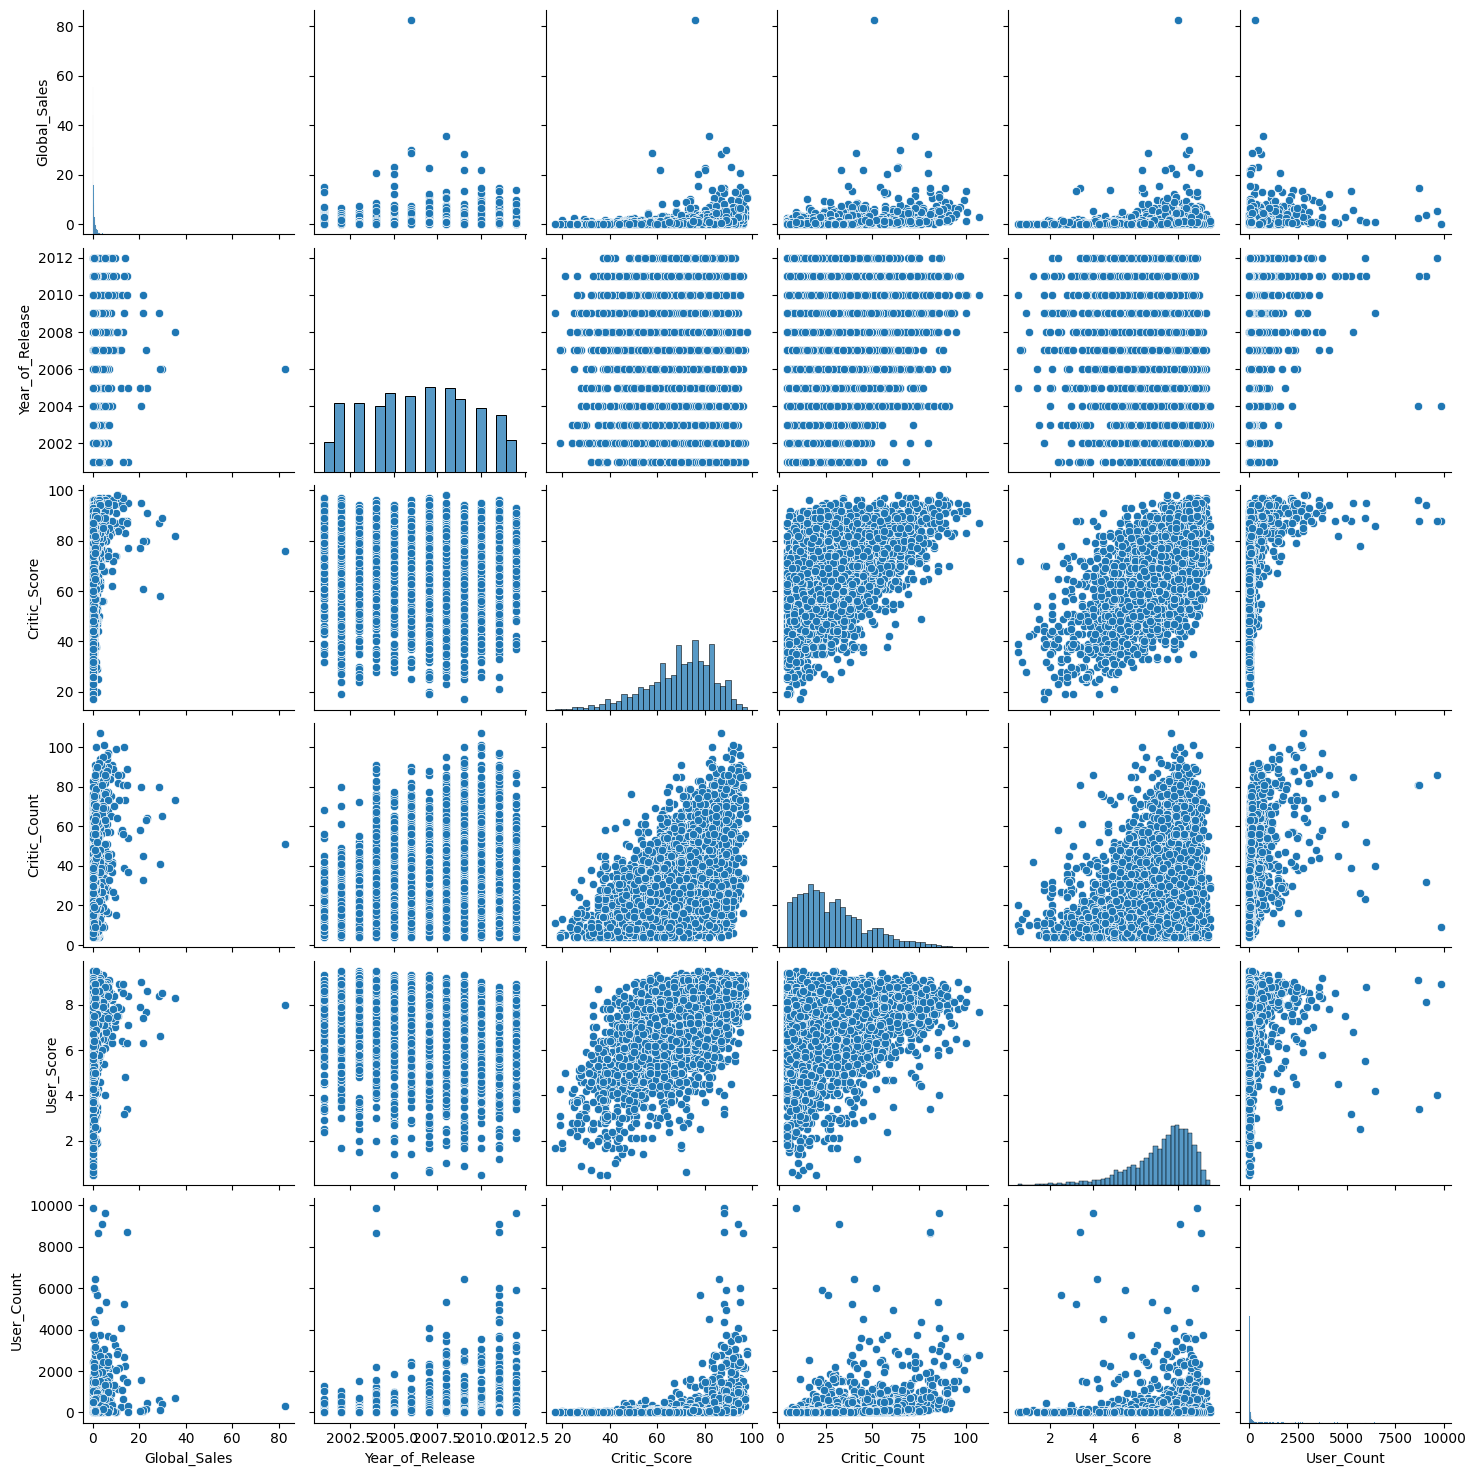

In [ ]:
sns.pairplot(df)

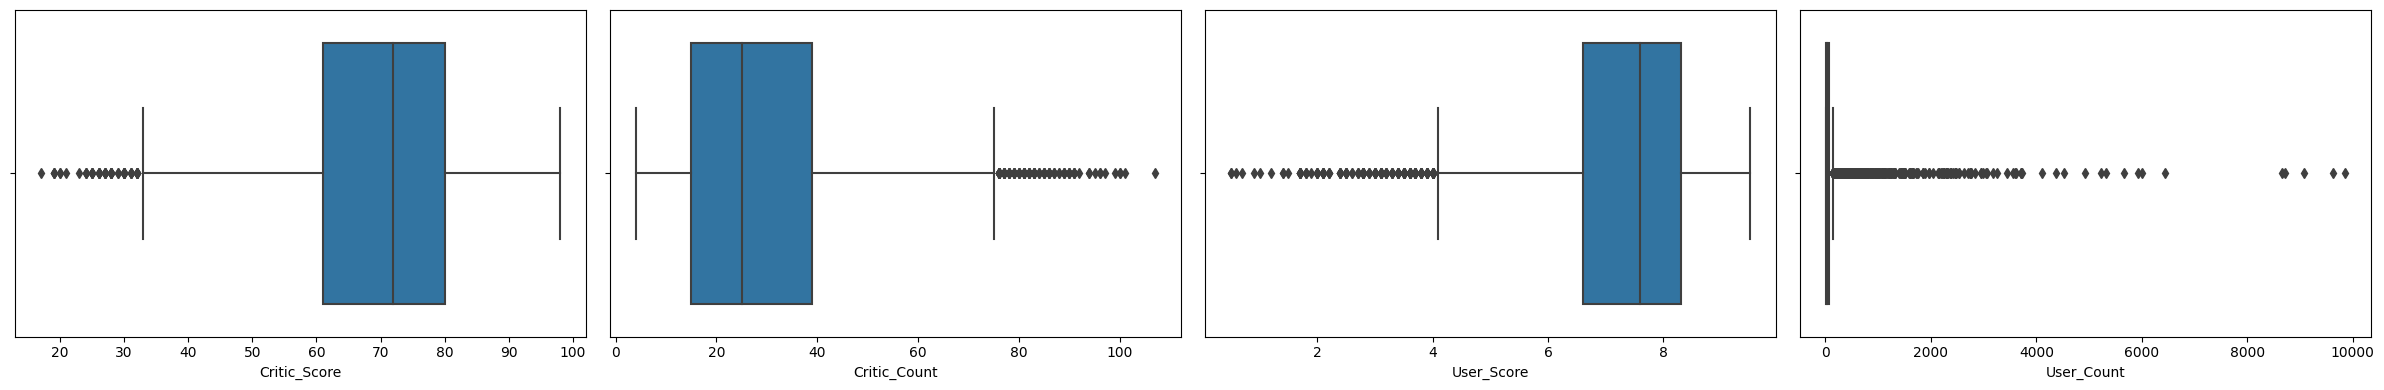

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(24, 4))

dist_critic_score = sns.boxplot(x=df['Critic_Score'], ax=axes[0])
dist_critic_count = sns.boxplot(x=df['Critic_Count'], ax=axes[1])
dist_user_score = sns.boxplot(x=df['User_Score'], ax=axes[2])
dist_user_count = sns.boxplot(x=df['User_Count'], ax=axes[3])

plt.tight_layout()
plt.show()


## Exploring user count across differnt Categories (Platform, Publisher, Genre, Developers)

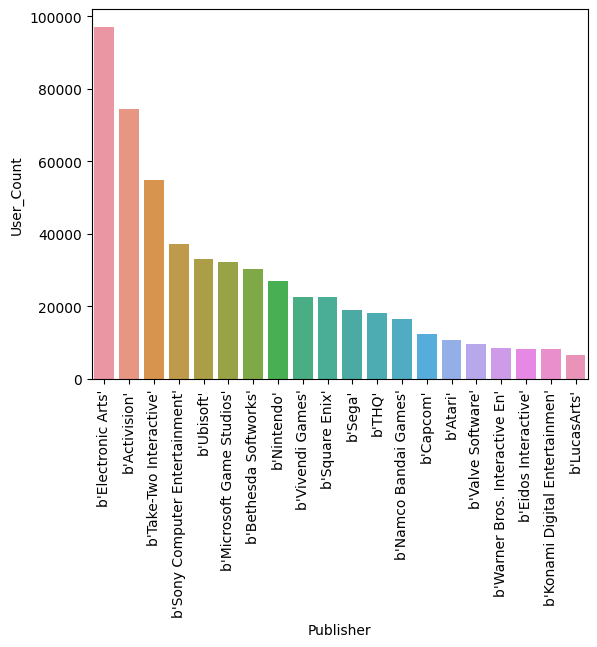

In [ ]:
# Sum of user count across Publisher
category_sum = df.groupby('Publisher')['User_Count'].sum().reset_index()
category_sum = category_sum.sort_values(by='User_Count', ascending=False)[:20]
sns.barplot(x='Publisher', y='User_Count', data=category_sum)
x =plt.xticks(rotation='vertical')

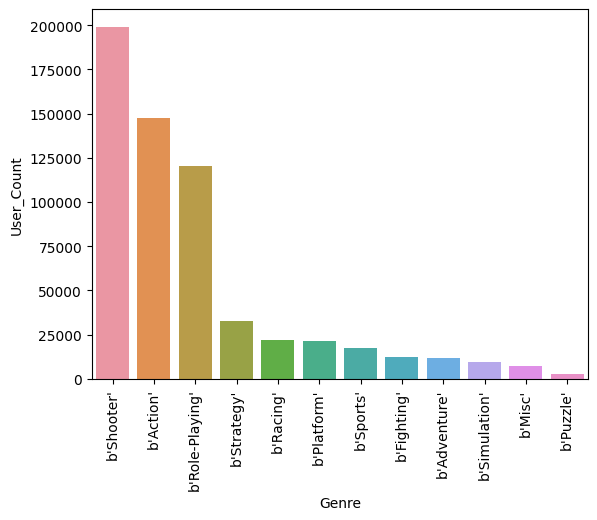

In [ ]:
# Sum of user count across Genre
category_sum = df.groupby('Genre')['User_Count'].sum().reset_index()
category_sum = category_sum.sort_values(by='User_Count', ascending=False)
sns.barplot(x='Genre', y='User_Count', data=category_sum)
x =plt.xticks(rotation='vertical')

<Axes: xlabel='Platform', ylabel='User_Count'>

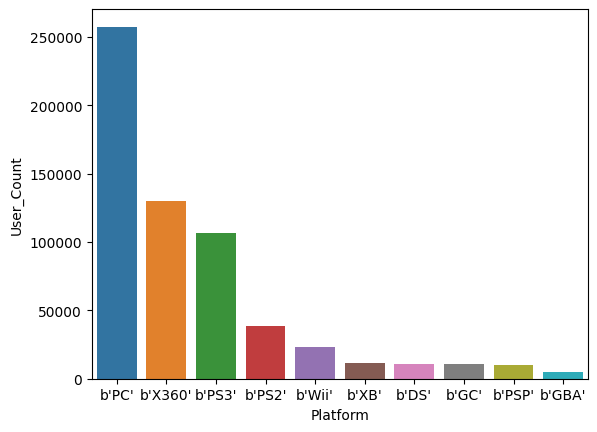

In [ ]:
# Sum of user count across platforms
category_sum = df.groupby('Platform')['User_Count'].sum().reset_index()
category_sum = category_sum.sort_values(by='User_Count', ascending=False)
sns.barplot(x='Platform', y='User_Count', data=category_sum)

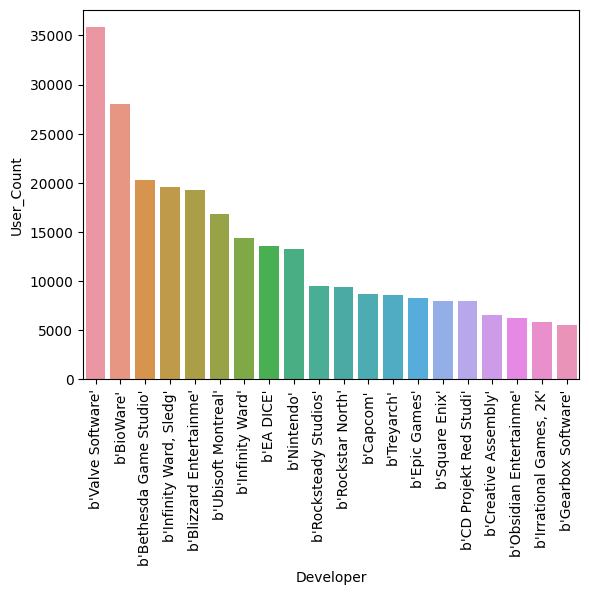

In [ ]:
# Sum of user count across Developers
category_sum = df.groupby('Developer')['User_Count'].sum().reset_index()
category_sum = category_sum.sort_values(by='User_Count', ascending=False)[:20]
sns.barplot(x='Developer', y='User_Count', data=category_sum)
x =plt.xticks(rotation='vertical')

## Exploring Global sales distribution


Text(0.5, 0, 'log(global sales)')

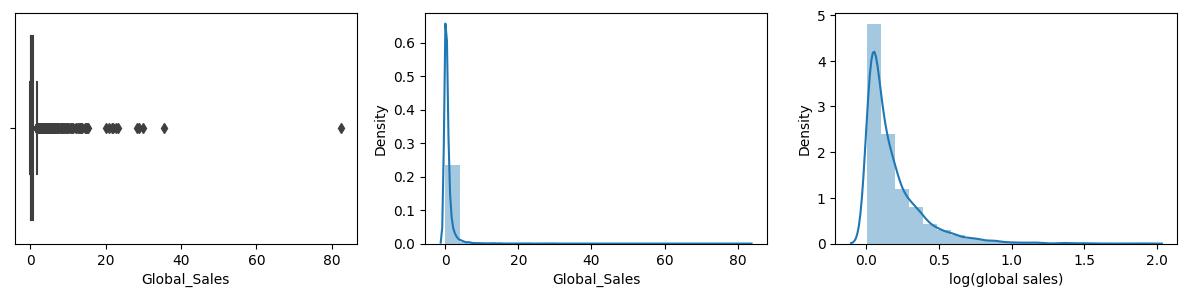

In [ ]:
# plotting distribution of Global sales values
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

# Box plot
dist_critic_score = sns.boxplot(x=df['Global_Sales'], ax=axs[0])

# checking the distribution of the target variable
sns.distplot(df['Global_Sales'], bins = 20, ax=axs[1])

# The data is right skewed and might require a log distribution of better prediction
# log tranformation (adding 1 to car price value to avoid log(0) error)
log_global_sales = np.log10(df['Global_Sales']+1)
a = sns.distplot(log_global_sales, bins = 20, ax=axs[2])
a.set_xlabel("log(global sales)")

## Sum of Global sales vs different categorical variables (Developers, Genre, Publisher & Platform)

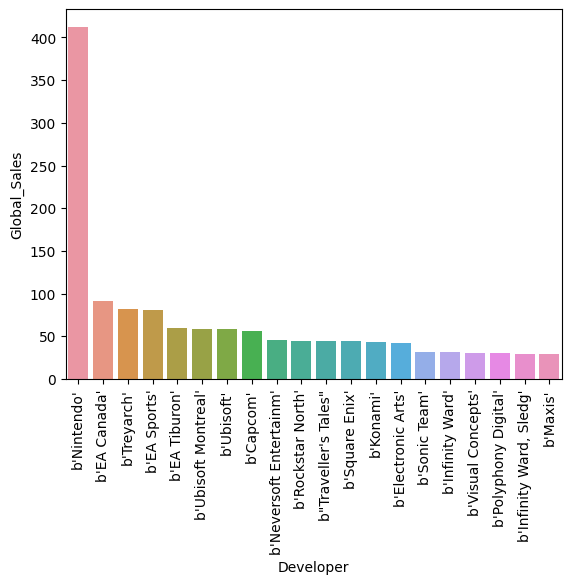

In [ ]:
# Sum of Global Sales across Developers
category_sum = df.groupby('Developer')['Global_Sales'].sum().reset_index()
category_sum = category_sum.sort_values(by='Global_Sales', ascending=False)[:20]
sns.barplot(x='Developer', y='Global_Sales', data=category_sum, orient='v')
ticks = plt.xticks(rotation='vertical')

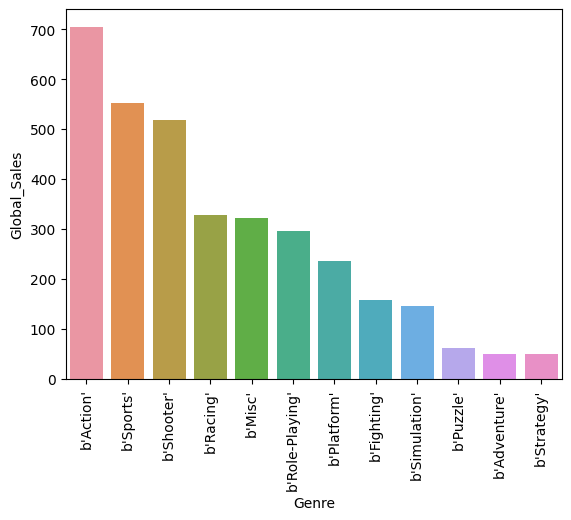

In [ ]:
# Sum of Global Sales across Genre
category_sum = df.groupby('Genre')['Global_Sales'].sum().reset_index()
category_sum = category_sum.sort_values(by='Global_Sales', ascending=False)
sns.barplot(x='Genre', y='Global_Sales', data=category_sum, orient='v')
x = plt.xticks(rotation='vertical')

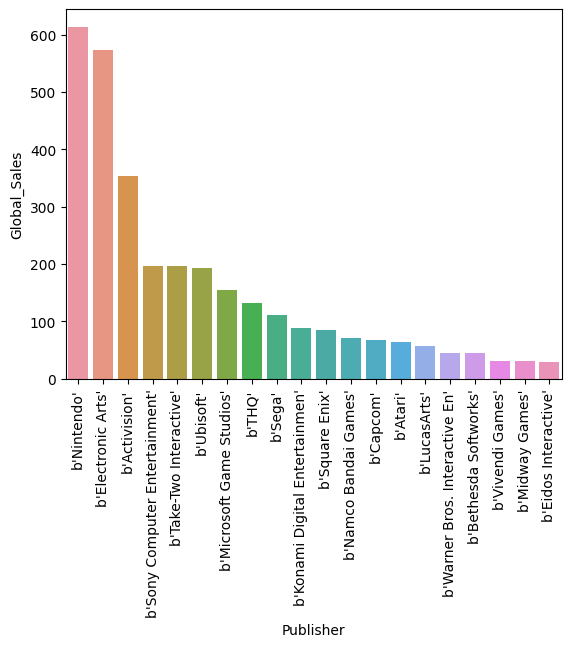

In [ ]:
# Sum of Global Sales across Publishers
category_sum = df.groupby('Publisher')['Global_Sales'].sum().reset_index()
category_sum = category_sum.sort_values(by='Global_Sales', ascending=False)[:20]
sns.barplot(x='Publisher', y='Global_Sales', data=category_sum, orient='v')
x = plt.xticks(rotation='vertical')

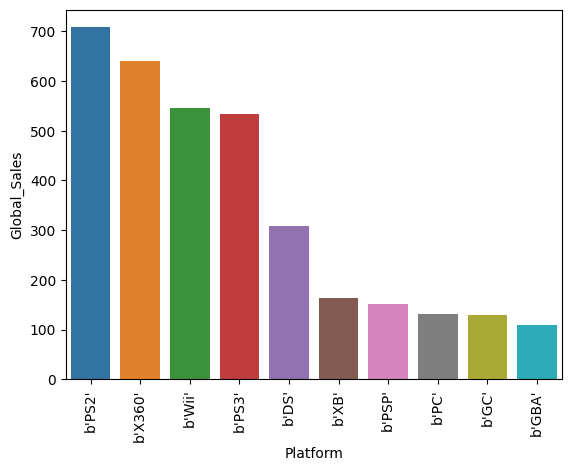

In [ ]:
# Sum of Global Sales across Platform
category_sum = df.groupby('Platform')['Global_Sales'].sum().reset_index()
category_sum = category_sum.sort_values(by='Global_Sales', ascending=False)
sns.barplot(x='Platform', y='Global_Sales', data=category_sum, orient='v')
x = plt.xticks(rotation='vertical')

## Notes on variable to be includes and dropped from the dataset
#### Categorical variables to include for building the regression model based exploratory analysis

While exploring user counts and global sales across various categorical variable, some of the categories had significantly more sum of user counts and global sales. For these reason, the top values were chosen to be a part of the dataset as one hot encoded vectors and the rest as other.

The following values from each categorical varaible is chosen.
1. Publishers: EA, Activision, Take two Interactive, Nintendo, Other(s)
2. Genre: Shooter, Action, Roleplay, Sports, other(s)
3. Platform: PC, XBox, PS, Wii, other(s)
4. Developer: Nintendo
5. Ratings: All categories included

Since Year of Release are all distinct categories, They are probably not a good indicator as these values may not appear in the future. This is also an assumption as critic scores and user scores from years could have an effect on global sales. For simplicity, Year of release is dropped

Dropping Names of games as well, since we cannot do regression on text data.

In [ ]:
# Dropping variables
# The following varibles cannot be categoriezed.
# Names, Publisher, Genre, plotform developer, Year of release, Critic count, User count
df_dropped = df.drop(['Year_of_Release','Name'], axis=1)
df_dropped.head()



,Platform,Genre,Publisher,Developer,Rating,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,b'PS3',b'Sports',b'Electronic Arts',b'EA Tiburon',b'E',2.38,83.0,36.0,6.1,68.0
1,b'PS2',b'Platform',b'Sony Computer Entertainment',b'Sucker Punch',b'E',1.21,86.0,41.0,8.6,184.0
2,b'X360',b'Action',b'Electronic Arts',b'Pandemic Studios',b'T',0.63,55.0,58.0,7.0,110.0
3,b'Wii',b'Shooter',b'Ubisoft',b'Ubisoft Paris',b'T',0.62,80.0,73.0,8.6,178.0
4,b'X360',b'Action',b'LucasArts',b'LucasArts',b'T',1.43,61.0,59.0,5.7,180.0


In [ ]:
# Creating dummy variables for features with more than 2 unique values
Rating_dummies = pd.get_dummies(df_dropped['Rating'],drop_first=True)
Rating_dummies = Rating_dummies.rename(columns={b'E10+': "E10+", b"M": "M", b"T":"T"})
df = pd.concat([df_dropped,Rating_dummies],axis=1)
df.drop(['Rating'], axis=1, inplace=True)
df.head()

,Platform,Genre,Publisher,Developer,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,E10+,M,T
0,b'PS3',b'Sports',b'Electronic Arts',b'EA Tiburon',2.38,83.0,36.0,6.1,68.0,0,0,0
1,b'PS2',b'Platform',b'Sony Computer Entertainment',b'Sucker Punch',1.21,86.0,41.0,8.6,184.0,0,0,0
2,b'X360',b'Action',b'Electronic Arts',b'Pandemic Studios',0.63,55.0,58.0,7.0,110.0,0,0,1
3,b'Wii',b'Shooter',b'Ubisoft',b'Ubisoft Paris',0.62,80.0,73.0,8.6,178.0,0,0,1
4,b'X360',b'Action',b'LucasArts',b'LucasArts',1.43,61.0,59.0,5.7,180.0,0,0,1


In [ ]:
df_copy = df.copy()
# # One hot encoding for all categories
Developer_categories = [b'Nintendo']
Publisher_categories = [b'Electronic Arts',b'Activison',b'Take-Two Interactive',b'Nintendo']
Platform_categories = [b'PC',b'X360',b'PS2',b'Wii']
Genre_categories = [b'Shooter',b'Action',b'Roleplay',b'Sports']

df_copy['Developer'] = np.where(df_copy['Developer'].isin(Developer_categories), df_copy['Developer'], 'other')
df_copy['Publisher'] = np.where(df_copy['Publisher'].isin(Publisher_categories), df_copy['Publisher'], 'other')
df_copy['Platform'] = np.where(df_copy['Platform'].isin(Platform_categories), df_copy['Platform'], 'other')
df_copy['Genre'] = np.where(df_copy['Genre'].isin(Genre_categories), df_copy['Genre'], 'other')



Developer_dummies = pd.get_dummies(df_copy['Developer'], prefix='Developer')
Publisher_dummies = pd.get_dummies(df_copy['Publisher'], prefix='Publisher')
Platform_dummies = pd.get_dummies(df_copy['Platform'], prefix='Platform')
Genre_dummies = pd.get_dummies(df_copy['Genre'], prefix='Genre')

df_copy = pd.concat([df_copy, Developer_dummies, Publisher_dummies, Platform_dummies, Genre_dummies], axis=1)
df_copy.drop(['Publisher', 'Developer', 'Platform', 'Genre'], axis=1, inplace=True)
df_copy.head()


,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,E10+,M,T,Developer_b'Nintendo',Developer_other,...,Publisher_other,Platform_b'PC',Platform_b'PS2',Platform_b'Wii',Platform_b'X360',Platform_other,Genre_b'Action',Genre_b'Shooter',Genre_b'Sports',Genre_other
0,2.38,83.0,36.0,6.1,68.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,1.21,86.0,41.0,8.6,184.0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
2,0.63,55.0,58.0,7.0,110.0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
3,0.62,80.0,73.0,8.6,178.0,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
4,1.43,61.0,59.0,5.7,180.0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

X = df_final[["Critic_Score", "Critic_Count", "User_Score",
       "User_Count", 'E10+', 'M', 'T', "Developer_b'Nintendo'",
       "Developer_other", "Publisher_b'Electronic Arts'",
       "Publisher_b'Nintendo'", "Publisher_b'Take-Two Interactive'",
       "Publisher_other", "Platform_b'PC'", "Platform_b'PS2'",
       "Platform_b'Wii'", "Platform_b'X360'", "Platform_other",
       "Genre_b'Action'", "Genre_b'Shooter'", "Genre_b'Sports'",
       "Genre_other"]]

# Adding constant to the data frame for B0
X = sm.add_constant(X)
y = df_final['Global_Sales']
model = LinearRegression()



lr = sm.OLS(y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     99.96
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          2.36e-310
Time:                        16:41:18   Log-Likelihood:                -8864.1
No. Observations:                4413   AIC:                         1.777e+04
Df Residuals:                    4394   BIC:                         1.789e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

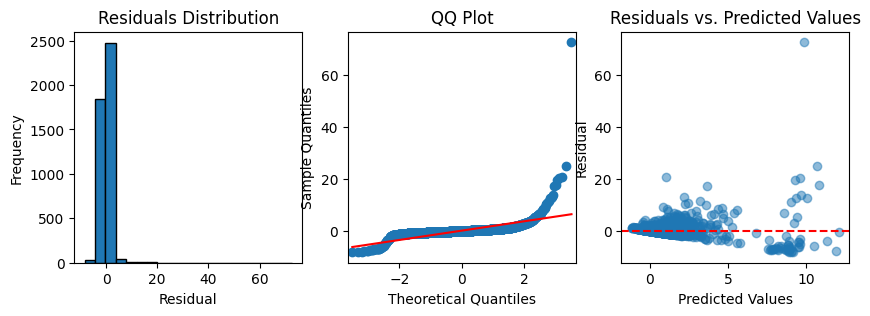

In [ ]:

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

residuals = lr.resid

# Residuals distribution
axs[0].hist(residuals, bins=20, edgecolor='black')
axs[0].set_title("Residuals Distribution")
axs[0].set_xlabel("Residual")
axs[0].set_ylabel("Frequency")

# QQ plot
sm.qqplot(residuals, line="s", ax=axs[1])
axs[1].set_title("QQ Plot")

# Scatter plot
axs[2].scatter(lr.fittedvalues, residuals, alpha=0.5)
axs[2].axhline(y=0, color='r', linestyle='--')
axs[2].set_title("Residuals vs. Predicted Values")
axs[2].set_xlabel("Predicted Values")
axs[2].set_ylabel("Residual")

plt.show()





#### Interpretation of linear regression

1. R squared and Adjusted Rsquared: 0.291 is relatively low which means the model is not able to explain the variance in the data. The adjusted R^2 is a little lower than R^2, but not by much, it shows that there are no irrelevant independent variables that are not explaining the variance.


2. F statistic and F test:The high F value and a p value < 0.01 suggests that there is significant linear relationship between independent variables and the dependent variable and the model is statistically significant. There is no strong evidence to reject the null hypothesis that all the regression coefficients are equal to zero.

3. t-statistic: large t values indicate evidence against the null hypothesis of each individual independent variable, it measures the number of standard deviations the estimated coefficient is away from zero. In the table above only the categorical variable has a low t value of -2.424, and p value greater than 0.01. This shows that this variable coefficient is insignificant in predicting global sales. All the other variables have a p value less than 0.01 and hence they are significant in predicting global sales. However, all independent variables are significant at 5% alpha level.  

4. coefficients and standard errors: It is hard to comprehend the standard errors as the data is not normalized. However, here are a few observations. The user ratings have a negative relationship with global sales. This seems very counter intuitive, as higher user rating should have a positive relationship with global sales. This needs more investigation, there could be interaction effects or confounding variables causing this. It is possible that global sales is determined by the previous years user ratings, which is not accounted for in this data. Developer - Nintendo has a high beta value of 4.324, with a high standard error, however this value is significant in predicting global sales.

5. Residuals: The deviation of points on the tails of the q-q plot suggests that this shows that the residuals do not follow a normal distribution. This is against the assumption of normality of distribution of the errors. There could be outliers in the dataset that need to be treated. The distribution of errors is also skewed. The funnel shape of the residuals on the residual vs predicted values shows the presence of heteroscedasticity. This shows that the variability of residuals does not systematically change as the values of independent variables change. This can be treated by transforming the independent and dependent variables.

In Conclusion, most of the dependent variables are significant, but they don't explain the variation in the independent (global sales) variable as the R^2 value is very low. This means there could be more features that could explain the variation. As observed from the plots there are outliers in the data that need to be treated. Clearly the assumption of homoscedasticity is violated and needs to be corrected using variable transformation. Adding interaction variables could help improve R^2.



### Question 2

The following steps are impleted to improve model performance
1. Adding interaction variables transforming variables
2. Checking and eleminating outliers in the data using Cook's D method
3. Checking for multicolinearity
4. Treating heteroscedasticity

Note: The following steps were performed in a iterative fashion but only the last iteration results are shown the below code.

#### Adding interaction variable and transforming data

In [ ]:
# A Python package for describing statistical models and for building design matrices.
!pip install patsy
import patsy

In [ ]:
df_final['User_Count'] = np.log(df_final['User_Count']+1)
df_final['User_Score'] = np.log(df_final['User_Score']+1)
df_final['Critic_Count'] = np.log(df_final['Critic_Count']+1)
df_final['Critic_Score'] = np.log(df_final['Critic_Score']+1)
df_final['Global_Sales'] = np.log(df_final['Global_Sales']+1)



# Adding more features , interaction variables
df_interaction = df_final.copy()
formula = "Critic_Score*Critic_Count + Critic_Score*User_Score + Critic_Score*User_Count + Critic_Count*User_Score + Critic_Count*User_Count + User_Score*User_Count"
df_interactions = patsy.dmatrix(formula, data=df_interaction, return_type='dataframe')
df_interaction = pd.concat([df_interaction, df_interactions], axis=1)
df_interaction.head()

# adding square of critic score, critic count, user_score, user count
features_to_square = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
squared_features = df_interaction[features_to_square].apply(np.square)
df_squared = pd.concat([df_interaction, squared_features.add_suffix('_squared')], axis=1)

#df = df_squared.copy()
df = df_squared.copy()
df = df.loc[:, ~df.columns.duplicated(keep='first')]

df.head()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,E10+,M,T,Developer_b'Nintendo',Developer_other,...,Critic_Score:Critic_Count,Critic_Score:User_Score,Critic_Score:User_Count,Critic_Count:User_Score,Critic_Count:User_Count,User_Score:User_Count,Critic_Score_squared,Critic_Count_squared,User_Score_squared,User_Count_squared
0,0.461132,0.688294,0.656274,0.550935,0.681337,0,0,0,0,1,...,0.451710,0.379206,0.468960,0.361565,0.447144,0.375373,0.473749,0.430696,0.303530,0.464220
1,0.378355,0.689494,0.661794,0.576818,0.712709,0,0,0,0,1,...,0.456303,0.397713,0.491409,0.381735,0.471666,0.411103,0.475402,0.437971,0.332719,0.507954
2,0.288868,0.673491,0.675500,0.561701,0.697506,0,0,1,0,1,...,0.454943,0.378301,0.469764,0.379429,0.471165,0.391790,0.453590,0.456300,0.315508,0.486515
3,0.286642,0.687038,0.683857,0.576818,0.711786,0,0,1,0,1,...,0.469836,0.396296,0.489024,0.394461,0.486760,0.410571,0.472021,0.467661,0.332719,0.506640
4,0.400067,0.677379,0.676140,0.545425,0.712098,0,0,1,0,1,...,0.458003,0.369460,0.482360,0.368784,0.481478,0.388396,0.458842,0.457165,0.297489,0.507084


In [ ]:

df.columns = df.columns.str.replace("'", "")
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns

Index(['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'E10+', 'M', 'T', 'Developer_bNintendo',
       'Developer_other', 'Publisher_bElectronic_Arts', 'Publisher_bNintendo',
       'Publisher_bTake_Two_Interactive', 'Publisher_other', 'Platform_bPC',
       'Platform_bPS2', 'Platform_bWii', 'Platform_bX360', 'Platform_other',
       'Genre_bAction', 'Genre_bShooter', 'Genre_bSports', 'Genre_other',
       'Intercept', 'Critic_Score:Critic_Count', 'Critic_Score:User_Score',
       'Critic_Score:User_Count', 'Critic_Count:User_Score',
       'Critic_Count:User_Count', 'User_Score:User_Count',
       'Critic_Score_squared', 'Critic_Count_squared', 'User_Score_squared',
       'User_Count_squared'],
      dtype='object')

In [ ]:
# Adding more interaction variables
df_interaction = df.copy()
formula = 'User_Count * User_Score * (Publisher_bElectronic_Arts + Publisher_bNintendo + Publisher_bTake_Two_Interactive + Publisher_other)'
df_interactions = patsy.dmatrix(formula, data=df_interaction, return_type='dataframe')
df_interaction = pd.concat([df_interaction, df_interactions], axis=1)

#df = df_squared.copy()
df = df_interaction.copy()
df = df.loc[:, ~df.columns.duplicated(keep='first')]

df.head()
df.shape


(4413, 47)

In [ ]:
X = df[['Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'E10+', 'M', 'T', 'Developer_bNintendo',
       'Developer_other', 'Publisher_bElectronic_Arts', 'Publisher_bNintendo',
       'Publisher_bTake_Two_Interactive', 'Publisher_other', 'Platform_bPC',
       'Platform_bPS2', 'Platform_bWii', 'Platform_bX360', 'Platform_other',
       'Genre_bAction', 'Genre_bShooter', 'Genre_bSports', 'Genre_other',
       'Intercept', 'Critic_Score:Critic_Count', 'Critic_Score:User_Score',
       'Critic_Score:User_Count', 'Critic_Count:User_Score',
       'Critic_Count:User_Count', 'User_Score:User_Count',
       'Critic_Score_squared', 'Critic_Count_squared', 'User_Score_squared',
       'User_Count_squared', 'User_Count:User_Score',
       'User_Count:Publisher_bElectronic_Arts',
       'User_Score:Publisher_bElectronic_Arts',
       'User_Count:User_Score:Publisher_bElectronic_Arts',
       'User_Count:Publisher_bNintendo',
       'User_Count:Publisher_bTake_Two_Interactive',
       'User_Count:Publisher_other', 'User_Score:Publisher_bNintendo',
       'User_Score:Publisher_bTake_Two_Interactive',
       'User_Score:Publisher_other',
       'User_Count:User_Score:Publisher_bNintendo',
       'User_Count:User_Score:Publisher_bTake_Two_Interactive',
       'User_Count:User_Score:Publisher_other']]



# Adding constant to the data frame for B0
X = sm.add_constant(X)


# Log tranforming data
y = df['Global_Sales']
model = LinearRegression()


lr = sm.OLS(y, X).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     134.9
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:58:58   Log-Likelihood:                 4026.6
No. Observations:                4413   AIC:                            -7977.
Df Residuals:                    4375   BIC:                            -7734.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

#### Removing Outlier in the data
using Cook's D method

<Axes: >

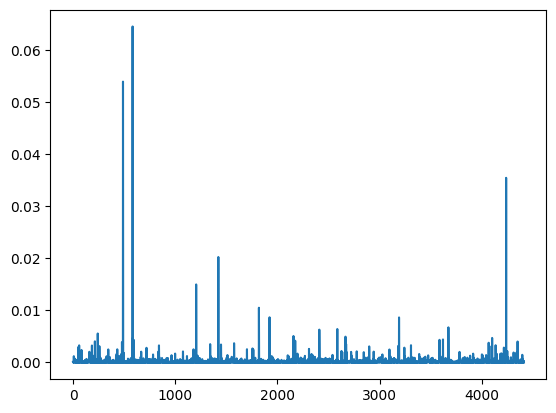

In [ ]:
model = sm.OLS(y, X).fit()

# Calculating Cook's distance
influence = OLSInfluence(model)
cook_distance = influence.cooks_distance[0]
threshold = 0.5

cook_distance.plot()
# Pretty low values

### Treating multicolinearity
Using
- RFE (Recursive feature elimination)


<Axes: >

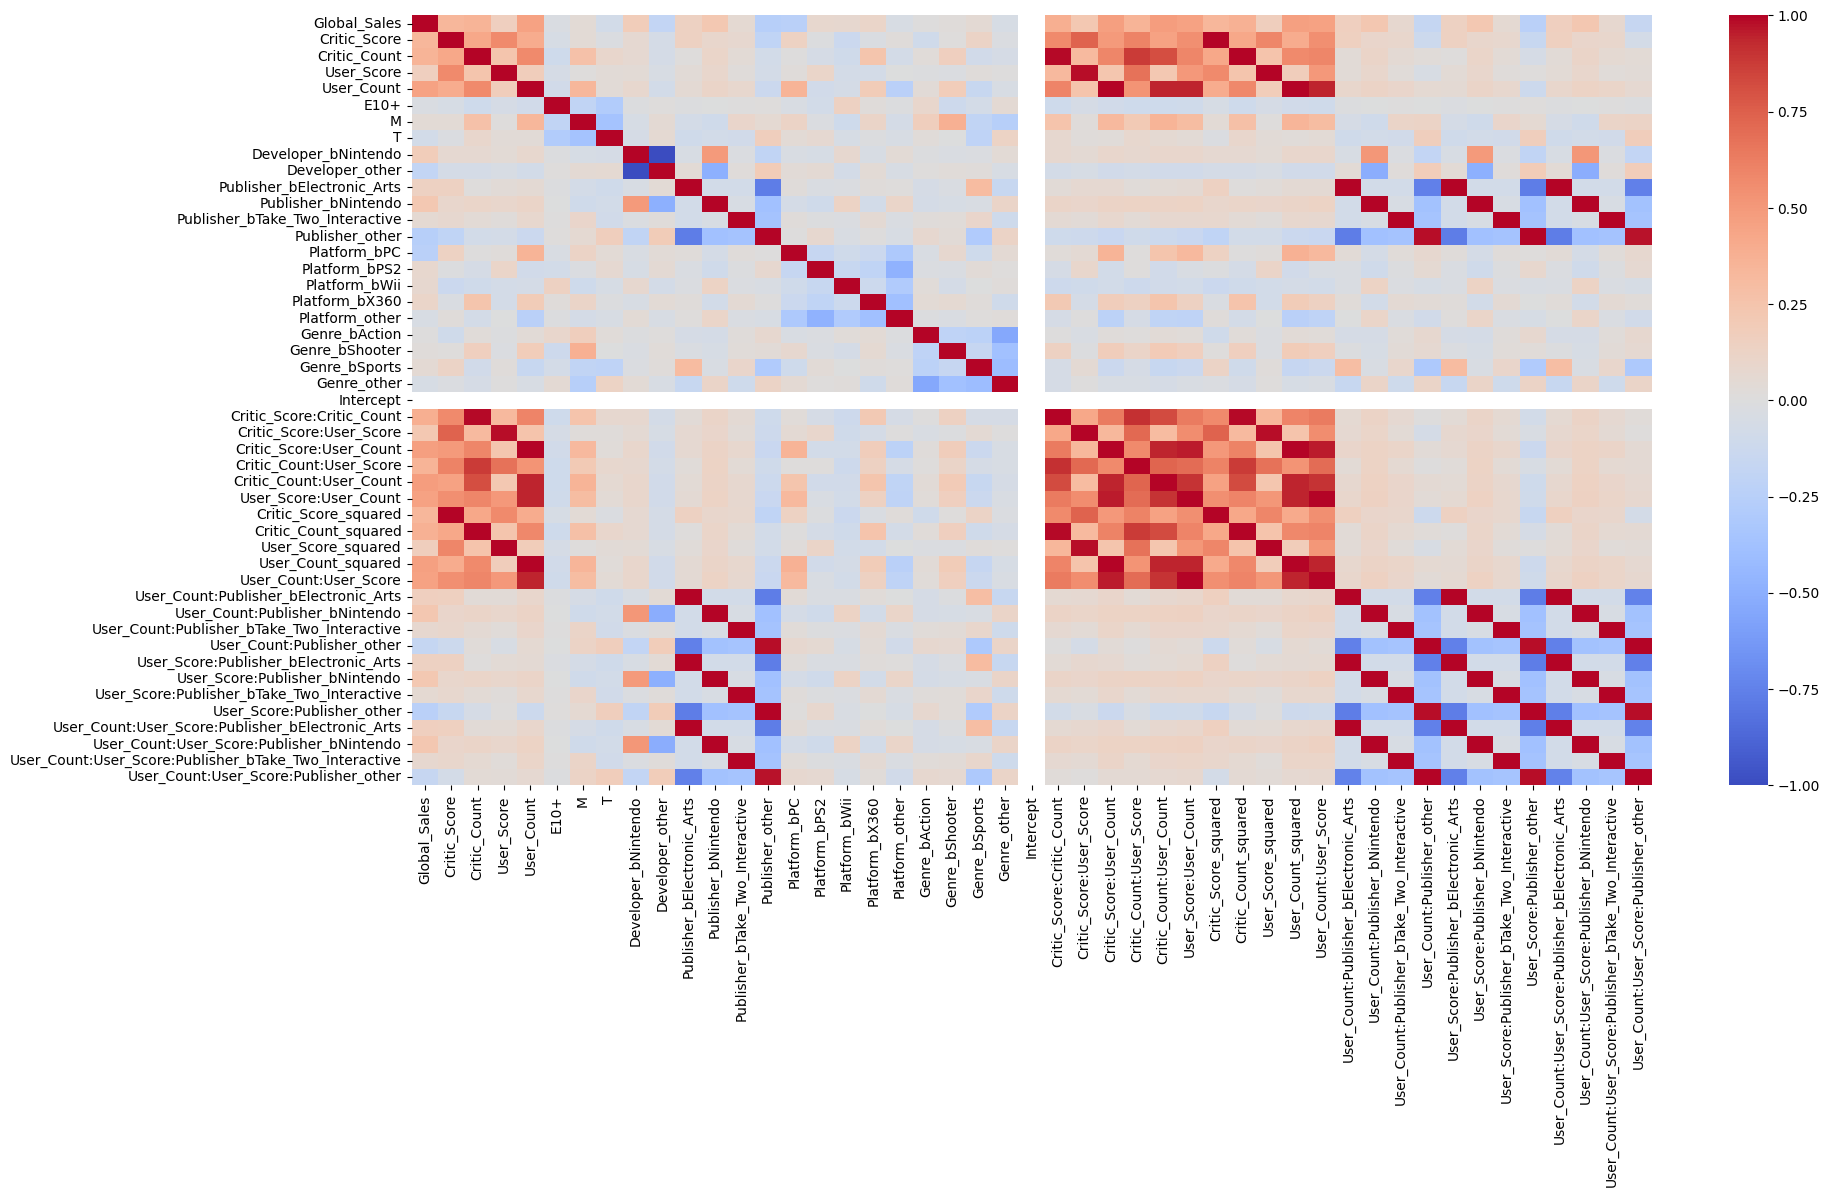

In [ ]:
# Multicolinearity
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=False, fmt='.1f', cmap='coolwarm')


#### RFE Notes
reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.



In [ ]:
# RFE - Recursive feature elimination
# Keeping top 14 features
rfe = RFE(model,n_features_to_select=14)
rfe.fit(X, y)
cols = X.columns[rfe.support_]
X_subset = X[cols]
lm = sm.OLS(y, X_subset).fit()
print(lm.summary())



                                 OLS Regression Results                                
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              1362.
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                        0.00
Time:                        20:54:22   Log-Likelihood:                          4152.0
No. Observations:                4413   AIC:                                     -8276.
Df Residuals:                    4399   BIC:                                     -8187.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                                            coef    std err          t      P>|t|      [0.025      0.975

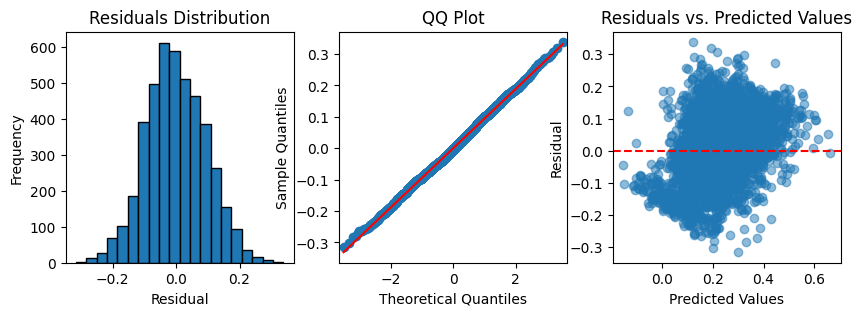

In [ ]:

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

residuals = lm.resid

# Residuals distribution
axs[0].hist(residuals, bins=20, edgecolor='black')
axs[0].set_title("Residuals Distribution")
axs[0].set_xlabel("Residual")
axs[0].set_ylabel("Frequency")

# QQ plot
sm.qqplot(residuals, line="s", ax=axs[1])
axs[1].set_title("QQ Plot")

# Scatter plot
axs[2].scatter(lr.fittedvalues, residuals, alpha=0.5)
axs[2].axhline(y=0, color='r', linestyle='--')
axs[2].set_title("Residuals vs. Predicted Values")
axs[2].set_xlabel("Predicted Values")
axs[2].set_ylabel("Residual")

plt.show()



y =  14.09*Critic_Score + -19.85*Critic_Count + 5.69*User_Score + -2.96*User_Count + 22.31*Critic_Score:Critic_Count + -6.27*Critic_Score:User_Score + -2.72*Critic_Count:User_Score + 10.74*Critic_Count:User_Count + -16.51*Critic_Score_squared + -2.67*User_Count_squared + 0.07*User_Score:Publisher_bElectronic_Arts + 0.03*User_Count:Publisher_bTake_Two_Interactive + 0.17*User_Score:Publisher_bNintendo

